# AIAP Week 6 - Building a Machine Learning Application

Welcome to the last week of our coursework! In this week, we will look at deploying a model we have built in previous weeks. Unlike past weeks, where the focus is on the development of a high-performing statistical model, we will look at how to properly use this model, to put it into a server, and let users use it without the need of opening up our Jupyter notebook.   
    
 It is important to note that because of the nature of this week's assignment, the skills required will be slightly different from prior weeks. As always, feel free to engage your peers or any of us if you would like more information. __For those who are new to serving code__, do take the time to understand the underlying concepts instead of copying code. __For those with prior experience__, you might want to focus on serialising a model, dockers, or exploring big data tools that are not commonly seen in the typical software stack.

Goals for the week:
1. To deploy an AI/Machine Learning application
2. To create a reproducible project
3. To prototype quickly and work smart i.e. look for existing open-source projects and improvise them based on your project needs
4. To have fun :)

Credits to Raimi Karim (batch 1 apprentice) for resources for the week.

## 1. Project Idea

Because the nature of this week's coursework is to build a simple machine learning app, the project will be more free form. Our approach is as follows: we will prepare a baseline problem statement with close hand-holding for people who have not had prior experience with software engineering to work on. If after approaching this toy example, you feel that you are capable of doing more, we warmly invite you to give it a try, and perhaps share with the class. If you feel that this is trivial, you may wish to attempt your own problem statement from the start.

<font color=darkblue>Our baseline project will be printed in this colour - dark blue. Jupyter Lab users may not be able to see this colour.</font>

Like any other app project, we begin with defining a good problem statement. Formulating a clear problem statement will help give clarity to the problem we are solving. A well defined problem statement now allows us to focus on engineering and model development later, which means less distraction and time wasted due to context switching.

One way to think about problem statements are through the '5W/1H' approach. Where we answer the following questions:  
  
- **Who** experiences this problem? What are their characteristics?  
- **What** is the actual problem?  
- **Why** does this app solve the problem?  
- **How** will it be implemented?  
- **When, where** should it be deployed? (not relevant for this week)

<font color=darkblue>For a baseline project, we will be attempting to build a fruit classifier, which attempts to classify 3 different types of fruits: apples, oranges and pears. Suppose we have someone who has difficulty identifying fruits. In that case, building this app will help him identify fruit appropriately.</font>

## 2. Workflow

We now move on to the actual workflow of training the model. The below is a standard set of steps for a mini-project. However, depending what what you do, you might need some variation, so modify them to your needs at your own discretion.

### 2.1 Obtain data

We begin by collecting the data that we wish to train on. In this step, think more about the data you will need - how much would you need, and in what form should it be? In some cases, the problem we want to solve might already have a clean dataset to work on. In other cases, pre-trained models make our problem easier, and hence we only need a small fraction of a full-fledge training data.  

For problems where data might not be present, you might want to also think about how to collect and label data. <br/>

<font color=darkblue>For our case, we will begin by collecting images of each of the 3 fruits. We will use Google's image search to crawl a few pages of images for each label. Luckily, there are already tools out there to help you crawl of images - you can use this [python package](https://github.com/hardikvasa/google-images-download), or alternatively, `fastai` library has a [`download_images`](https://docs.fast.ai/vision.data.html#download_images) method.</font>

In [10]:
from google_images_download import google_images_download   #importing the library

response = google_images_download.googleimagesdownload()   #class instantiation

arguments = {"keywords":"apples fruit,oranges fruit,pears fruit","limit":10000,"metadata":False,"chromedriver":"C:\\Users\\LENOVO\\Documents\\chromedriver.exe"}   #creating list of arguments
paths = response.download(arguments)   


Item no.: 1 --> Item name = apples fruit
Evaluating...
Getting you a lot of images. This may take a few moments...
Reached end of Page.
Starting Download...
Completed Image ====> 1. apple-benefits_620x350_51507721694.jpg
Completed Image ====> 2. pair-ripe-red-green-apple-260nw-725462782.jpg
Completed Image ====> 3. 918yna3baal._sl1500_.jpg
Completed Image ====> 4. apple2.jpg
Completed Image ====> 5. 001511184-1?$article%2d235%2dsquare$.jpg
Completed Image ====> 6. 1200px-honeycrisp.jpg
Completed Image ====> 7. 150919153848-01-popular-fruits-apples-large-169.jpg
Completed Image ====> 8. apples.jpg
Completed Image ====> 9. 10-varieties-apples-social-09517-1024x538.jpg
Completed Image ====> 10. fruits-apples-1-728.jpg
Completed Image ====> 11. fresh-red-apples-on-white-background-picture-id183422512?s=612x612.jpg
Completed Image ====> 12. 267290-apples.jpg
Completed Image ====> 13. apples.jpg
Completed Image ====> 14. red_apples_on_tree.jpg
Completed Image ====> 15. bonza-apple.jpg
Compl

Completed Image ====> 145. ms-jbunker-198-md108176_vert.jpg
Completed Image ====> 146. pexels-photo-211355.png
Completed Image ====> 147. apples-2533195_960_720.jpg
Completed Image ====> 148. apples3.jpg
Completed Image ====> 149. apples-apple-red-apples-fruit-raw-food-healthy-food-eating-healthy-food-produce-local-food-still-life-photography-1453957.jpg
Completed Image ====> 150. chinafresh_white_qinguan_apple_fruit2012327933080.jpg
Completed Image ====> 151. 1391035274000-honeycrisp-apple.jpg
Completed Image ====> 152. 000375139-1?$article%2d235%2dsquare$.jpg
Completed Image ====> 153. apple.jpg
Completed Image ====> 154. 1priority-presentation.042.jpeg
Completed Image ====> 155. 1000x-1.jpg
Completed Image ====> 156. 39019-39019-image-39019-favourite%20apple%20collection.jpg
Completed Image ====> 157. dsc_8974_original.jpg
Completed Image ====> 158. apples-fruit-for-sale-picture-id835768868.jpg
Completed Image ====> 159. 19recipehealthrings-superjumbo.jpg
Completed Image ====> 160. 

Completed Image ====> 279. 9dccdnm.jpg
Completed Image ====> 280. 145_syukaku_01.jpg
Completed Image ====> 281. p203_190.198_dg-winesap.jpg
Completed Image ====> 282. apples_on_tree_2011_g1_cropped.jpg
Completed Image ====> 283. apples.jpg
Completed Image ====> 284. ateapples%203trenlarged.jpg
Completed Image ====> 285. apple-facts.jpg
Completed Image ====> 286. alaskapink.bmp
Completed Image ====> 287. 28-sunburn-poor-blush-necrosis-web800px.jpg
Completed Image ====> 288. apples-wrinkled-fruit-spoiled-fruits-windfall-camp-apples-apple-kind-delicious-moisture-loss-bruises-old-foul-furrowed-shrivels-x3b0pb.jpg
Completed Image ====> 289. apple.jpg
Completed Image ====> 290. 1371609443933.jpeg
Completed Image ====> 291. divide-conquer-keep-apples-bananas-tomatoes-other-fruits-fresher-longer.w1456.jpg
Completed Image ====> 292. apple-1327228.jpg
Completed Image ====> 293. apples_featured.jpg
Completed Image ====> 294. maxresdefault.jpg
Completed Image ====> 295. 1.-apple-cider-vinegar-1.jp

Completed Image ====> 419. 87695190_xs.jpg
Completed Image ====> 420. applessquare-300x300.jpg
Completed Image ====> 421. b15f15235e48b907403f66f4dce552fe--fruit-photography-color-photography.jpg
Completed Image ====> 422. gurney-s-fruit-trees-plants-60095-64_400_compressed.jpg
Completed Image ====> 423. 264_pyo_apples.jpg
Completed Image ====> 424. kingblack-box1.jpg
Completed Image ====> 425. kissabel_southernhemisphere.jpg
Completed Image ====> 426. fresh-organic-farm-apple-juice-ice-glass-raw-whole-sliced-red-apples-fresh-organic-farm-apple-juice-ice-109852606.jpg
Completed Image ====> 427. ?format=1000w.jpg
Completed Image ====> 428. intro-apples.jpg
Completed Image ====> 429. pinklady.png
Completed Image ====> 430. cloned-apples2.jpg
Completed Image ====> 431. 13584627_f520.jpg
Completed Image ====> 432. best-fruits-for-a-diabetes-friendly-diet-06-1440x810.jpg
Completed Image ====> 433. when-are-apples-in-season.jpg
Completed Image ====> 434. mangoes.jpg
Completed Image ====> 435

Completed Image ====> 560. granny-smith-apples-hanoian.jpg
Completed Image ====> 561. grobe-fruit-farm-apples-1277x539.jpg
Completed Image ====> 562. home-apple.jpg
Completed Image ====> 563. fruit-sorting-apples.jpg
Completed Image ====> 564. 161007.crimson.crisp.apples.october.314.jpg
Completed Image ====> 565. apple%20allington%20pippin.jpg
Completed Image ====> 566. applediagnosis-pcfeeding.jpg
Completed Image ====> 567. photo-t-apple.jpg
Completed Image ====> 568. applescab3_600px.jpg
Completed Image ====> 569. 2529_14525_z.jpg
Completed Image ====> 570. bnm_05-08-2014_news_07_479565955_ct677x380.jpg
Completed Image ====> 571. little-girl-picking-apples-fruit-orchard-child-farm-autumn-playing-apple-tree-kids-pick-basket-toddler-eating-58649546.jpg
Completed Image ====> 572. maxresdefault.jpg
Completed Image ====> 573. article-0-153fc7c0000005dc-60_1024x615_large.jpg
Completed Image ====> 574. apple_slice_406x250-1.jpg
Completed Image ====> 575. apples-515211_960_720.jpg
Completed 

Completed Image ====> 696. cherries.jpg
Completed Image ====> 697. maxresdefault.jpg
Completed Image ====> 698. applemaggot2_600px.jpg
Completed Image ====> 699. apples-makes-children-more-alert_696x400_51511776653.jpg
Completed Image ====> 700. opimages.ash
IncompleteReadError on an image...trying next one... Error: IncompleteRead(17259 bytes read, 351122 more expected)
Completed Image ====> 701. qinguan_apple.jpg
Completed Image ====> 702. golden-supreme-apples.jpg
Completed Image ====> 703. usapple-website-social-image.png
Completed Image ====> 704. apples_fruit_red_apple_cutting_board_bowl_single_food_healthy-833812.jpg
Completed Image ====> 705. fresh-apples-fruit-bowl-260nw-171869741.jpg
Completed Image ====> 706. e7e09ea04cc7f199c98f66fd52f164c6.jpg
Completed Image ====> 707. fctg-apples.jpg
Completed Image ====> 708. ciderapples-1570kp-1.jpg
Completed Image ====> 709. dried-fruit-apple-slices-apple-dried-apples-dried-2023616.jpg
Completed Image ====> 710. dsc_3032_custom-dedd26

Completed Image ====> 71. seamless-pattern-oranges-fruit-fresh-450w-1078864103.jpg
Completed Image ====> 72. 160477865_cf7882be4e_b-600x300.jpg
Completed Image ====> 73. 12514011_0_640x640.jpg
Completed Image ====> 74. oranges-grpefruit-090616.jpg
Completed Image ====> 75. 24475800-orange-juice-in-glass-and-oranges-fruit-with-green-leaves.jpg
Completed Image ====> 76. thinkstockphotos-494037394.jpg
Completed Image ====> 77. oranges-fruit-vitamins-healthy-eating-51958.jpeg
Completed Image ====> 78. untitled-1-300x300.png
Completed Image ====> 79. canva-orange-white-oranges-fruits-product-tri-fold-brochure-mace35fzdw4.jpg
IOError on an image...trying next one... Error: The read operation timed out
Completed Image ====> 80. 4304450_iphone7__color_silver_298604.png.560x560-w.m80.jpg
Completed Image ====> 81. 272782-orange-heart.jpg
Completed Image ====> 82. 845_14-amazing-benefits-of-mandarin-oranges-for-skin-hair-and-health_shutterstock_116644108.jpg
Completed Image ====> 83. cutting-oran

Completed Image ====> 195. oranges-5-300x294.png
Completed Image ====> 196. creamy-orange-fruit-salad-700x1118.jpg
Completed Image ====> 197. healthy-tangerines-oranges-fruit-clementines-3068419.jpg
Completed Image ====> 198. st_20161227_jhorange_8_2832104.jpg
Completed Image ====> 199. sweet-oranges-fruits-minneola-stock-image_csp12869560.jpg
Completed Image ====> 200. fruitrefreshersmandarinorangescoconutwater.png
Completed Image ====> 201. oranges.jpg
Completed Image ====> 202. 16_61060_30e_01e_v1x.jpg
Completed Image ====> 203. hyatt-fruit-company-page-5_91d00337-a2e0-450f-9eda-cb4765047558.jpg
Completed Image ====> 204. apple_orange_banana.jpg
Completed Image ====> 205. grpes_trans_nvbqzqnjv4bqy0xmne4berkpvwhc-fw2chuhgqj--ggxf5qkj8ok6bu.jpg
Completed Image ====> 206. 189982-landschaften-oranges-fruit-fruits.png
Completed Image ====> 207. chocolate-orange-slices-2.jpg
Completed Image ====> 208. 297_1.jpg
Completed Image ====> 209. 36114806-sweet-oranges-fruits-mineola-.jpg
Complete

Completed Image ====> 316. apples-kiwi-oranges-fruit-51335.jpeg
Completed Image ====> 317. exps82815_th153345d07_21_8b.jpg
Completed Image ====> 318. oranges-fruit-on-wooden-table-450w-523346413.jpg
Completed Image ====> 319. 7429880-3x2-940x627.jpg
Completed Image ====> 320. overhead-view-of-citrus-fruit-slices-on-blue-background_23-2147879646.jpg
Completed Image ====> 321. oranges_d.jpg
Completed Image ====> 322. fresh-indian-oranges-nagpur.jpg
Completed Image ====> 323. oranges-citrus-fruit-tangerines-lemons-bowl-1173.jpg
Completed Image ====> 324. 4pcs-mini-oranges-fruit-for-dollhouse-miniature-photography-props-1-12-one-inch-scale.jpg
Completed Image ====> 325. storing-and-prepping-a-variety-of-citrus-fruit.jpg
Completed Image ====> 326. delicious-japanese-satsuma-oranges-fruit-725x544.jpg
Completed Image ====> 327. il_340x270.1517330376_l0a6.jpg
Completed Image ====> 328. orange-juice-oranges-fruit-fruits-glass-portrait-format-orange-juice-oranges-fruit-fruits-glass-portrait-form

Completed Image ====> 441. picking-orange-400x600.jpg
Completed Image ====> 442. landscape-1518087992-citrus-fruits.jpg
Completed Image ====> 443. canva-oranges%2c-fruit%2c-citrus-fruit%2c-citrus%2c-orange-bahia-macv4ebitgu.jpg
Completed Image ====> 444. fotolia_3274455_xs.jpg
Completed Image ====> 445. image?url=https%3a%2f%2fcdn-image.myrecipes.com%2fsites%2fdefault%2ffiles%2fstyles%2f4_3_horizontal_-_1200x900%2fpublic%2fimage%2fgalleries%2f08%2f7ww-oranges-mr-gallery-x.jpg%3fitok%3dch6evu2k&w=1000&c=sc&poi=face&q=70.jpg
Completed Image ====> 446. tangelo_1_abundantharvestkitchen.jpg
Completed Image ====> 447. x15kg-of-oranges-navelina-mesa.jpg
Completed Image ====> 448. sliced-blood-oranges-texture-citrus-background-cut-ripe-juicy-sicilian-blood-oranges-fruits-on-back-background-top-view-p4y4ah.jpg
Completed Image ====> 449. oranges-fruit-whole-slices-peeled-picture-id508622180?k=6&m=508622180&s=612x612&w=0&h=5r3temb045adxg0ib1okapcpenratwth86ez1sxfawk=.jpg
Completed Image ====> 450

Completed Image ====> 554. a1b5a7a26bd6278522dd3cf09e67545a.jpg
Completed Image ====> 555. oranges_fruit_citrus_fruit_farmers_local_market-1242255.jpg
Completed Image ====> 556. lots-of-fresh-oranges-fruit-close-up-bma8w8.jpg
Completed Image ====> 557. how-to-dry-oranges.png
Completed Image ====> 558. moro-blood-oranges.jpg
Completed Image ====> 559. dekopon_1.jpg
Completed Image ====> 560. large.png
Completed Image ====> 561. colours-oranges-fruit1.jpg
Completed Image ====> 562. ls.jpg
Completed Image ====> 563. orangesfruit_realfoodtorontocom-clementine-oranges_group.jpg
Completed Image ====> 564. black%20spot.jpg
Completed Image ====> 565. oranges-fruits-clementine-77254.jpeg
Completed Image ====> 566. 1200px-citrus_reticulata_april_2013_nordbaden.jpg
Completed Image ====> 567. 16_61061_30e_01ex.jpg
Completed Image ====> 568. oranges-are-not-the-only-fruit-1-728.jpg
Completed Image ====> 569. fruitshare-half_share-blood_oranges_1280x1280.jpg
Completed Image ====> 570. skd286704sdc_x

Completed Image ====> 671. maxresdefault.jpg
Completed Image ====> 672. 51s%2blkudzyl._sy355_.jpg
Completed Image ====> 673. 60124175-orange-cake-with-oranges-fruits-is-delicious.jpg
Completed Image ====> 674. pngtree-add-apples-oranges-png-clipart_779744.jpg
Completed Image ====> 675. orange-sliced-on-white-background-576x544.jpg
Completed Image ====> 676. oranges-fruit-whole-slices-peeled-picture-id508633690?k=6&m=508633690&s=612x612&w=0&h=2olp11ykvwon6qv6t0e-edu-xhdf3gy7h5ix56vfrp8=.jpg
Completed Image ====> 677. bloody-red-oranges-fruits-fyj1x6.jpg
Completed Image ====> 678. 534af452a8fa39df473e74eb272b62a5.jpg
Completed Image ====> 679. oranges_fruit_citrus_fruits-1213540.jpg
Completed Image ====> 680. img_20160729_211036.jpg
Completed Image ====> 681. indian-oranges-500x500.jpg
Completed Image ====> 682. depositphotos_79513174-stock-photo-four-oranges-fruits-composition.jpg
Completed Image ====> 683. cf87bff620316a67954514c2bf7a020c.jpg
Completed Image ====> 684. oranges_fruit_fo

Completed Image ====> 116. pear-512.png
Completed Image ====> 117. pears.jpg
Completed Image ====> 118. fruit-pears-vector-478862.jpg
Completed Image ====> 119. fruitcup-dicedpears.png
Completed Image ====> 120. pears.jpg
Completed Image ====> 121. pear-rotate-still-1400x788.jpg
Completed Image ====> 122. 292-600x600.jpg
Completed Image ====> 123. pears-isolated-on-white-background_38145-420.jpg
Completed Image ====> 124. idshot_540x540.jpg
Completed Image ====> 125. b025_abbe_fetel.jpg
Completed Image ====> 126. 220px-pear_ds.jpg
Completed Image ====> 127. poached-pears-with-fruit-mince-stuffing-12982-1.jpg
Completed Image ====> 128. pair_a_pear-1-lr-sq_800x.jpg
Completed Image ====> 129. these-fruit-moulds-let-you-grow-your-own-heart-shaped-watermelons-or-buddha-shaped-pears.jpg
Completed Image ====> 130. image?url=https%3a%2f%2fcdn-image.foodandwine.com%2fsites%2fdefault%2ffiles%2fstyles%2fmedium_2x%2fpublic%2fbuddha-pear-ft-blog0717.jpg%3fitok%3d6ycktqkt&w=1000&c=sc&poi=face&q=70.j

Completed Image ====> 247. saffron-poached-pears-8-copy.jpg
Completed Image ====> 248. pears-resized-850x455.jpg
Completed Image ====> 249. d1062_92_448_1200.jpg
Completed Image ====> 250. pears-smaller-250x250.jpg
Completed Image ====> 251. prickly-pear-fruit-5010864940_fa0d740fe0_o.jpg
Completed Image ====> 252. frpea25188_3.jpg
Completed Image ====> 253. pears-usa_11911533_cc16c95ffba4e38cac4415e651e518f5_t.jpg
Completed Image ====> 254. c26b0d3133288749431f346358112199--pear-smoothie-smoothies.jpg
Completed Image ====> 255. pear-pears_650x400_51460191230.jpg
Completed Image ====> 256. wfp-pears-_0000s_0008_layer-2-copy-9.jpg
Completed Image ====> 257. pear-banana.jpg
Completed Image ====> 258. fruit-pear-pears-table-81899.jpeg
Completed Image ====> 259. pears_hugolochner.jpg
Completed Image ====> 260. apple-pear-hero.jpg
Completed Image ====> 261. fruit_three-pears.jpg
Completed Image ====> 262. pear-tree-beaute-flammande.jpg
Completed Image ====> 263. treatedpears112rc-4.jpg
Compl

Completed Image ====> 376. 12822.png
Completed Image ====> 377. pears.jpg
Completed Image ====> 378. asian_pears_bottom.jpg
Completed Image ====> 379. maxresdefault.jpg
Completed Image ====> 380. pears.jpg
Completed Image ====> 381. il_340x270.1285707379_n9rg.jpg
Completed Image ====> 382. green_pears_thumbnail_01.jpg
Completed Image ====> 383. 7-tasting_notes-pears-forelle.jpg
Completed Image ====> 384. seckel-pears_4.jpg
Completed Image ====> 385. c4e8cef695e6dcd92fe87c8b2767d75a.jpg
Completed Image ====> 386. prickly_pear.jpg
Completed Image ====> 387. pair-952187_960_720.jpg
Completed Image ====> 388. pears864x573.jpg
Completed Image ====> 389. kriauses-bff2-250x250.jpg
Completed Image ====> 390. applepear.png
Completed Image ====> 391. pears-illustration_0.jpg
Completed Image ====> 392. pears-and-constipation-360x360.jpg
Completed Image ====> 393. pear-fruits.jpg
Completed Image ====> 394. photo-1514756331096-242fdeb70d4a?ixlib=rb-1.2.1&ixid=eyjhchbfawqiojeymdd9&w=1000&q=80.jpg
Co

Completed Image ====> 512. pear%20beurre%20hardy.jpg
Completed Image ====> 513. fresh-tasty-pears-fruits--149.jpg
Completed Image ====> 514. 812c80yv5el.jpg
Completed Image ====> 515. skd286284sdc_xs.jpg
Completed Image ====> 516. page_image-000018.jpg
Completed Image ====> 517. 85025965-pears-japan-pears-isolated-on-white-background-pears-an-ancient-fruit-and-bearing-yellow-juicy-fruit.jpg
Completed Image ====> 518. varieties-600x337.jpg
Completed Image ====> 519. bca3761b28b72b1b5945a0cb69f6a80d--fruit-trees-pears.jpg
Completed Image ====> 520. triopears_320x213_grande.jpg
Completed Image ====> 521. baby-shaped-pears-china.jpg
Completed Image ====> 522. 30health-benefits-of-pear-fruit-by-allah-dad-khan-13-638.jpg
Completed Image ====> 523. pear%20assortment_apal_original_smaller.jpg
Completed Image ====> 524. prickly-pears.jpg
Completed Image ====> 525. pear_highdefinition_picture_167231.jpg
Completed Image ====> 526. fruit-appearance-of-gorham-grand-champion-la-france-and-gold-la-fr

Completed Image ====> 645. pear-icons-green-yellow-pears-icon-clip-art-clipart-cartoon-fruit-simple-design-119728987.jpg
Completed Image ====> 646. 9565322-a-bowl-of-fruit-apples-pears-and-oranges.jpg
Completed Image ====> 647. green_pear_fruit_png
Completed Image ====> 648. 1200px-shinko_yali_and_whangkeum.jpg
Completed Image ====> 649. stock-photo-fresh-pears-one-and-a-half-yellow-fruit-isolated-on-white-background-636022724.jpg
Completed Image ====> 650. pears-light-bulbs-pear-light-bulb-branch-branches-pear-tree-fruits-fruit-sheets-leaves-x6xa70.jpg
Completed Image ====> 651. checkneck-logo-2015-4-c_72-dpi.jpg
Completed Image ====> 652. mercadocentral1.jpg
Completed Image ====> 653. 70ee275840d34ac25b9e77b923744a9d--fruit-compote-pear-shapes.jpg
Completed Image ====> 654. fotolia_2829202_xs.jpg
Completed Image ====> 655. plant-fruit-food-produce-yellow-pear-healthy-still-life-painting-pears-fruit-tree-peer-citrus-macro-photography-flowering-plant-still-life-photography-1324021.jpg


### 2.2 Preprocess data

After getting the data, the next step is to see if our data is clean, and can be fed into the model.

Check if our data is clean involves checking for null values, extreme outliers, consistency of file names etc. This is dependent on the nature of your dataset. Sometimes it might also help to visualise your data.

We would also like to split our data into train-validation-test sets to track if our trained model later performs as well on the validation/test set as it did on our training set.

<font color=darkblue>In our case, we will like to split this dataset into train and test sets, using appropriate data loaders/generators to create labels of 0, 1 and 2 for the fruits (or otherwise appropriate). Using the appropriate library of your choice, preprocess the images with the right preprocessing methods - resizing into 224px, then doing a center crop, normalizing colour values (you can just divide by 255), and finally turning each image into a 3x244x244 tensor. You may also do additional augments if you please.</font>

In [ ]:
# import os 
# import numpy as np
# from PIL import Image
# from keras.applications.resnet50 import preprocess_input

# fruitlist=[]
# for filename in os.listdir("./downloads/apples fruit"):
#     try:
#         img = Image.open("./downloads/apples fruit/"+filename)
#         width, height = img.size

#         if height >= width:
#             basewidth = 244
#             wpercent = (basewidth/float(img.size[0]))
#             hsize = int((float(img.size[1])*float(wpercent)))

#         if height < width:
#             hsize = 244
#             hpercent = (hsize/float(img.size[1]))
#             basewidth = int((float(img.size[0])*float(hpercent)))    

#         img = img.resize((basewidth,hsize), Image.ANTIALIAS)
#         width, height = img.size
#         left = (width - 244)/2
#         top = (height - 244)/2
#         right = (width + 244)/2
#         bottom = (height +244)/2
#         img = img.crop((left, top, right, bottom))

#         arr = np.array(img)
#         if arr.shape == (244,244,3): fruitlist.append(np.array(img))

#     except:
#         None     

# allimg = np.stack(fruitlist)
# x_apple = preprocess_input(allimg)[:600,:,:,:]
    
# print(x_apple.shape)

# fruitlist=[]
# for filename in os.listdir("./downloads/oranges fruit"):
#     try:
#         img = Image.open("./downloads/oranges fruit/"+filename)
#         width, height = img.size

#         if height >= width:
#             basewidth = 244
#             wpercent = (basewidth/float(img.size[0]))
#             hsize = int((float(img.size[1])*float(wpercent)))

#         if height < width:
#             hsize = 244
#             hpercent = (hsize/float(img.size[1]))
#             basewidth = int((float(img.size[0])*float(hpercent)))    

#         img = img.resize((basewidth,hsize), Image.ANTIALIAS)
#         width, height = img.size
#         left = (width - 244)/2
#         top = (height - 244)/2
#         right = (width + 244)/2
#         bottom = (height +244)/2
#         img = img.crop((left, top, right, bottom))

#         arr = np.array(img)
#         if arr.shape == (244,244,3): fruitlist.append(np.array(img))

#     except:
#         None     

# allimg = np.stack(fruitlist)
# x_orange = preprocess_input(allimg)[:600,:,:,:]
    
# print(x_orange.shape)

# fruitlist=[]
# for filename in os.listdir("./downloads/pears fruit"):
#     try:
#         img = Image.open("./downloads/pears fruit/"+filename)
#         width, height = img.size

#         if height >= width:
#             basewidth = 244
#             wpercent = (basewidth/float(img.size[0]))
#             hsize = int((float(img.size[1])*float(wpercent)))

#         if height < width:
#             hsize = 244
#             hpercent = (hsize/float(img.size[1]))
#             basewidth = int((float(img.size[0])*float(hpercent)))    

#         img = img.resize((basewidth,hsize), Image.ANTIALIAS)
#         width, height = img.size
#         left = (width - 244)/2
#         top = (height - 244)/2
#         right = (width + 244)/2
#         bottom = (height +244)/2
#         img = img.crop((left, top, right, bottom))

#         arr = np.array(img)
#         if arr.shape == (244,244,3): fruitlist.append(np.array(img))

#     except:
#         None     

# allimg = np.stack(fruitlist)
# x_pear = preprocess_input(allimg)[:600,:,:,:]
    
# print(x_pear.shape)

In [ ]:
x = np.concatenate([x_apple,x_orange,x_pear],axis=0)
y = [0]*600+[1]*600+[2]*600

x.shape

In [4]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.3, random_state=42)

y_train = to_categorical(y_train,3,'float32')
y_val = to_categorical(y_val,3,'float32')

from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,
    horizontal_flip=True)

### 2.3 Train model

Train your model locally (on your computer) or in Google Colab. Once done, run a few tests on the test set, and see if it performs as well as in the training set. If you are not satisfied, you can retrain your model. Finally, export your model out with the appropriate format, and download the weights for future use. In most cases, you should look to run a transfer learning model on an already optimised model. For image models, you can try something like resnet50. There have been some discussion about transfer learning in text models too - models such as BERT and ELMo... yes we agree that the names are ridiculous.

<font color=darkblue>In our case, let's begin with a pretrained resnet50 model - ample code examples should be available for both torchvision and Keras. Freeze all layers except the last, and replace that with a linear layer of output size 3, fed through a softmax loss function. Be weary of overfitting when you train your model.</font>

In [1]:
import numpy as np
import pandas as pd

In [3]:
import pickle

x_apple = pickle.load(open('./data/x_apple2.pickle', 'rb'))
x_orange = pickle.load(open('./data/x_orange2.pickle', 'rb'))
x_pear = pickle.load(open('./data/x_pear2.pickle', 'rb'))

x = np.concatenate([x_apple,x_orange,x_pear],axis=0)
y = [0]*600 + [1]*600 + [2]*600

In [5]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.3, random_state=42)
y_train = to_categorical(y_train,3,'float32')
y_val = to_categorical(y_val,3,'float32')

from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,
    horizontal_flip=True)

x_train.shape

(1260, 244, 244, 3)

In [6]:
from keras.applications.resnet50 import preprocess_input, ResNet50
model = ResNet50(weights = "imagenet", include_top=False, input_shape = (244, 244, 3))

/usr/local/lib/python3.5/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [7]:
from keras.models import Sequential
from keras.layers import Activation,Dense,Dropout,Flatten,BatchNormalization
from keras.regularizers import l2

for layer in model.layers:
    layer.trainable = False

Initializer = 'he_normal'
activation = Activation('relu')
Regularizer = l2
regparam = 5e-3    

model2 = Sequential()
model2.add(model)

model2.add(Flatten())

model2.add(Dense(64,kernel_initializer=Initializer,kernel_regularizer=Regularizer(regparam)))
model2.add(BatchNormalization(momentum=0.9))
model2.add(activation)
model2.add(Dropout(0.7,seed=123))

model2.add(Dense(3,kernel_initializer=Initializer))
model2.add(Activation('softmax'))

model2.summary()

from keras import metrics
from keras.optimizers import Adam

adam = Adam(beta_1=0.9, beta_2=0.999, decay=0)
model2.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics = ['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 8, 8, 2048)        23587712  
_________________________________________________________________
flatten_1 (Flatten)          (None, 131072)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8388672   
_________________________________________________________________
batch_normalization_1 (Batch (None, 64)                256       
_________________________________________________________________
activation_50 (Activation)   (None, 64)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 195       
__________

In [8]:
from keras.callbacks import Callback
from keras.callbacks import LearningRateScheduler,EarlyStopping, ModelCheckpoint
from keras.models import load_model

def lr_sch(epoch):
    elp = 2
    decay = 0.5
    rate = 0.001    
    
    if epoch == 0: lrate = rate
    elif epoch >0 and epoch%elp ==0 : lrate = rate * (decay**(epoch//elp))
    elif epoch >0 and epoch%elp !=0 : lrate = rate * (decay**(epoch//elp))         
    return lrate

lrsch = LearningRateScheduler(lr_sch)


#early stopping
early_stop = EarlyStopping(monitor= 'val_loss', min_delta = 0.0000, patience=5, mode='min')
checkpoint = ModelCheckpoint("resnet.h5", monitor='val_loss', save_best_only=True, save_weights_only=False, mode='min', period=1)

#model_fit

batch_size = 8
modelfit = model2.fit_generator(datagen.flow(x_train, y_train, batch_size),
        steps_per_epoch = x_train.shape[0] / batch_size, 
        epochs=50,
        verbose=1,
        validation_data = (x_val,y_val),
        callbacks=[lrsch,early_stop,checkpoint] 
        )

Epoch 1/50
158/157 [==============================] - 26s 163ms/step - loss: 2.4501 - acc: 0.7191 - val_loss: 2.3702 - val_acc: 0.8519
Epoch 2/50
158/157 [==============================] - 22s 137ms/step - loss: 2.3986 - acc: 0.8133 - val_loss: 2.2807 - val_acc: 0.8815
Epoch 3/50
158/157 [==============================] - 20s 128ms/step - loss: 2.1061 - acc: 0.8552 - val_loss: 1.8404 - val_acc: 0.8741
Epoch 4/50
158/157 [==============================] - 20s 127ms/step - loss: 1.8634 - acc: 0.8267 - val_loss: 1.7562 - val_acc: 0.8796
Epoch 5/50
158/157 [==============================] - 20s 128ms/step - loss: 1.7012 - acc: 0.8568 - val_loss: 1.5452 - val_acc: 0.8704
Epoch 6/50
158/157 [==============================] - 20s 126ms/step - loss: 1.4669 - acc: 0.8671 - val_loss: 1.3648 - val_acc: 0.8796
Epoch 7/50
158/157 [==============================] - 20s 127ms/step - loss: 1.3108 - acc: 0.8813 - val_loss: 1.3237 - val_acc: 0.8500
Epoch 8/50
158/157 [==============================] - 2

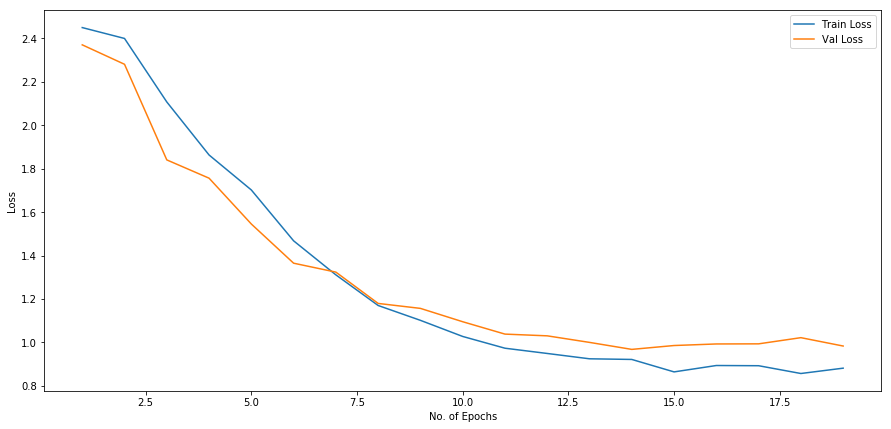

In [13]:
import pandas as pd
trainloss = pd.DataFrame(modelfit.history['loss'])
trainacc = pd.DataFrame(modelfit.history['acc'])
valloss = pd.DataFrame(modelfit.history['val_loss'])
valacc = pd.DataFrame(modelfit.history['val_acc'])

summary = pd.concat([trainloss,trainacc,valloss,valacc],axis=1)
summary.columns = ["train loss","train acc","val loss","val acc"]

import matplotlib.pyplot as plt
%matplotlib inline

# f, ax = plt.subplots(1,2,figsize=(15, 7))
# ax[0].plot(summary.index+1,summary['train acc'],label='Train Accuracy')
# ax[0].plot(summary.index+1,summary['val acc'],label='Val Accuracy')
# x_axis = ax[0].set_xlabel('No. of Epochs')
# y_axis = ax[0].set_ylabel('Accuracy')
# ax[0].legend()

# ax[1].plot(summary.index+1,summary['train loss'],label='Train Loss')
# ax[1].plot(summary.index+1,summary['val loss'],label='Val Loss')
# x_axis = ax[1].set_xlabel('No. of Epochs')
# y_axis = ax[1].set_ylabel('Loss')
# ax[1].legend()

f, ax = plt.subplots(figsize=(15, 7))
plt.plot(summary.index+1,summary['train loss'],label='Train Loss')
plt.plot(summary.index+1,summary['val loss'],label='Val Loss')
x_axis = plt.xlabel('No. of Epochs')
y_axis = plt.ylabel('Loss')
plt.legend()
plt.show()

In [10]:
from keras.models import load_model
model2 = load_model('resnet.h5')
eval1 = model2.evaluate(x_val,y_val)
eval1

540/540 [==============================] - 6s 12ms/step


[0.9679305871327718, 0.8851851865097329]

### VGG-16 results

In [6]:
from keras.applications.vgg16 import preprocess_input, VGG16
model = VGG16(weights = "imagenet", include_top=False, input_shape = (244, 244, 3))

In [11]:
from keras.models import Sequential
from keras.layers import Activation,Dense,Dropout,Flatten,BatchNormalization
from keras.regularizers import l2

for layer in model.layers:
    layer.trainable = False

Initializer = 'he_normal'
activation = Activation('relu')
Regularizer = l2
regparam = 5e-3    

model2 = Sequential()
model2.add(model)

model2.add(Flatten())

model2.add(Dense(64,kernel_initializer=Initializer,kernel_regularizer=Regularizer(regparam)))
model2.add(BatchNormalization(momentum=0.9))
model2.add(activation)
model2.add(Dropout(0.7,seed=123))

model2.add(Dense(3,kernel_initializer=Initializer))
model2.add(Activation('softmax'))

model2.summary()

from keras import metrics
from keras.optimizers import Adam

adam = Adam(beta_1=0.9, beta_2=0.999, decay=0)
model2.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics = ['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                1605696   
_________________________________________________________________
batch_normalization_2 (Batch (None, 64)                256       
_________________________________________________________________
activation_3 (Activation)    (None, 64)                0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 195       
__________

In [6]:
from keras.callbacks import Callback
from keras.callbacks import LearningRateScheduler,EarlyStopping, ModelCheckpoint
from keras.models import load_model

def lr_sch(epoch):
    elp = 2
    decay = 0.5
    rate = 0.001    
    
    if epoch == 0: lrate = rate
    elif epoch >0 and epoch%elp ==0 : lrate = rate * (decay**(epoch//elp))
    elif epoch >0 and epoch%elp !=0 : lrate = rate * (decay**(epoch//elp))         
    return lrate

lrsch = LearningRateScheduler(lr_sch)


#early stopping
early_stop = EarlyStopping(monitor= 'val_loss', min_delta = 0.0000, patience=5, mode='min')
checkpoint = ModelCheckpoint("resnet.h5", monitor='val_loss', save_best_only=True, save_weights_only=False, mode='min', period=1)

#model_fit

batch_size = 8
modelfit = model2.fit_generator(datagen.flow(x_train, y_train, batch_size),
        steps_per_epoch = x_train.shape[0] / batch_size, 
        epochs=20,
        verbose=1,
        validation_data = (x_val,y_val),
        callbacks=[lrsch,early_stop,checkpoint] 
        )

Epoch 1/20
158/157 [==============================] - 30s 192ms/step - loss: 1.4152 - acc: 0.7073 - val_loss: 0.9587 - val_acc: 0.9037
Epoch 2/20
158/157 [==============================] - 19s 123ms/step - loss: 1.1573 - acc: 0.8323 - val_loss: 0.9915 - val_acc: 0.8981
Epoch 3/20
158/157 [==============================] - 19s 123ms/step - loss: 1.0489 - acc: 0.8299 - val_loss: 0.8751 - val_acc: 0.9037
Epoch 4/20
158/157 [==============================] - 19s 123ms/step - loss: 0.9172 - acc: 0.8647 - val_loss: 0.7868 - val_acc: 0.9019
Epoch 5/20
158/157 [==============================] - 19s 123ms/step - loss: 0.8806 - acc: 0.8639 - val_loss: 0.7249 - val_acc: 0.9111
Epoch 6/20
158/157 [==============================] - 19s 123ms/step - loss: 0.7927 - acc: 0.8774 - val_loss: 0.6814 - val_acc: 0.9000
Epoch 7/20
158/157 [==============================] - 19s 122ms/step - loss: 0.7302 - acc: 0.8845 - val_loss: 0.6495 - val_acc: 0.8981
Epoch 8/20
158/157 [==============================] - 2

In [6]:
from keras.models import load_model
eval1 = model2.evaluate(x_val,y_val)
eval1

540/540 [==============================] - 15s 28ms/step


[0.5842712605441058, 0.9037037050282514]

### PyTorch - No Transfer Learning

In [1]:
import numpy as np
import pickle

x = pickle.load(open('x2.pickle', 'rb'))
y = [0]*600 + [1]*600 + [2]*600

In [2]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.3, random_state=42)

y_train = np.array(y_train)
y_val = np.array(y_val)

print(x_train.shape)
print(x_val.shape)

(1260, 244, 244, 3)
(540, 244, 244, 3)


In [3]:
import numpy as np
import pandas as pd

import torch
import torch.utils.data as utils
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision.transforms import *

torch.cuda.is_available()

True

In [4]:
tensor_xtrain = torch.stack([(ToTensor()(ToPILImage()(i))) for i in x_train])
tensor_xval = torch.stack([(ToTensor()(ToPILImage()(i))) for i in x_val])


tensor_ytrain = torch.cuda.LongTensor(y_train)
tensor_yval = torch.cuda.LongTensor(y_val)

trainset = utils.TensorDataset(tensor_xtrain,tensor_ytrain)
valset = utils.TensorDataset(tensor_xval,tensor_yval)

batch_size =8

train_loader = torch.utils.data.DataLoader(trainset,batch_size=batch_size,shuffle=True)
validation_loader = torch.utils.data.DataLoader(valset,batch_size=batch_size,shuffle=False)

data_loaders = {"train": train_loader, "val": validation_loader}
data_lengths = {"train": x_train.shape[0]/batch_size, "val": x_val.shape[0]/batch_size}

In [5]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(4, 8, 7, padding = 0)
        self.bn1 = nn.BatchNorm2d(num_features=8)
        self.conv2 = nn.Conv2d(8, 16, 7, padding =0)
        self.bn2 = nn.BatchNorm2d(num_features=16)
        self.conv3 = nn.Conv2d(16, 32, 5, stride =2, padding =0)
        self.bn3 = nn.BatchNorm2d(num_features=32)
        self.conv4 = nn.Conv2d(32, 64, 5, stride = 2, padding =0)
        self.bn4 = nn.BatchNorm2d(num_features=64)

        self.fc1 = nn.Linear(10816,512)
        self.bn6 = nn.BatchNorm1d(num_features=512)
        self.fc2 = nn.Linear(512, 64)
        self.bn7 = nn.BatchNorm1d(num_features=64)
        self.fc3 = nn.Linear(64, 3)
        
        self.drop = nn.Dropout(p=0.5)
        self.drop2d = nn.Dropout2d(p=0.1)
        self.pool1 = nn.MaxPool2d(2, 2)
        self.pool2 = nn.MaxPool2d(3, 2)
        
    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        x = self.pool1(F.relu(self.bn2(self.conv2(x))))
        x = self.drop2d(F.relu(self.bn3(self.conv3(x))))
        x = self.pool1(self.drop2d(F.relu(self.bn4(self.conv4(x)))))
        x = x.view(-1, 10816) #Flatten
        x = self.drop(F.relu(self.bn6(self.fc1(x))))
        x = F.relu(self.bn7(self.fc2(x)))
        x = self.fc3(x)
        return x

net = Net()
net = net.cuda()

from torchvision.transforms import *

trans = Compose([RandomRotation(15),
                 RandomHorizontalFlip(p=0.3),                 
                 ToTensor()])

criterion = nn.CrossEntropyLoss()

In [6]:
n_epochs=100
patience = 100

early_stop = [np.Inf]*patience
train_loss,val_loss = [], []
np.random.seed(1)

for epoch in range(n_epochs):  # loop over the dataset multiple times
    print('Epoch {}/{}'.format(epoch+1, n_epochs))
    print('-' * 10)

#     # learning rate schedule
#     elp = 5
#     decay = 0.5
#     rate = 0.0001
    
#     if epoch == 0: lrate = rate
#     elif epoch >0 and epoch%elp ==0 : lrate = rate * (decay**(epoch//elp))
#     elif epoch >0 and epoch%elp !=0 : lrate = rate * (decay**(epoch//elp))
        
    # Cyclic learning rate schedule with restarts
    min_lr = 1e-5
    max_lr = 1e-3
    restart = 20 # number of epochs to restart

    lrate = min_lr + 0.5*(max_lr - min_lr) * (1+np.cos(((epoch - (epoch//restart * restart))/ restart) * np.pi))

    for phase in ['train', 'val']:
        if phase == 'train':
            #optimizer = optim.SGD(net.parameters(), lr=lrate,momentum=0.9,nesterov=True,weight_decay=5e-4)
            optimizer = optim.Adam(net.parameters(), lr=lrate, betas=(0.9, 0.999), eps=1e-08, weight_decay=1e-3)
            net.train(True)  # Set model to training mode
        else:
            net.train(False)    
    
        running_loss = 0.0
        
        for data in data_loaders[phase]:#iteration loop for each minibatch
            # get the inputs
            inputs, labels = data
            
            #data augmentation
            inputs = [functional.to_pil_image(input0) for input0 in inputs] 
            for i in range(len(inputs)):
                if np.random.random() >=0.5: inputs[i] = trans(inputs[i])
                else: inputs[i] = ToTensor()(inputs[i])
            inputs = torch.stack(inputs).cuda()

            # zero the parameter gradients to accumulate again using loss.backward() in every iteration
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = net(inputs) # forward
            loss = criterion(outputs, labels) #get loss 
            
            if phase == 'train':
                loss.backward() #backpropagation
                optimizer.step()  #update parameters

            # print statistics
            running_loss += loss.item()        
        
        epoch_loss = running_loss / data_lengths[phase]
        print('{} Loss: {:.4f}'.format(phase, epoch_loss))
        if phase == 'train': train_loss.append(epoch_loss)
        if phase == 'val': val_loss.append(epoch_loss)
    print()
          
    if phase == 'val': #early stopping block        
        if len(early_stop) == patience: del early_stop[0]        
        early_stop.append(running_loss)
        if min(early_stop) == early_stop[0] : break      


Epoch 1/100
----------
train Loss: 0.8103
val Loss: 0.6956

Epoch 2/100
----------
train Loss: 0.7368
val Loss: 0.6116

Epoch 3/100
----------
train Loss: 0.7142
val Loss: 0.5758

Epoch 4/100
----------
train Loss: 0.6827
val Loss: 0.5768

Epoch 5/100
----------
train Loss: 0.6881
val Loss: 0.5409

Epoch 6/100
----------
train Loss: 0.6397
val Loss: 0.9796

Epoch 7/100
----------
train Loss: 0.6093
val Loss: 0.5445

Epoch 8/100
----------
train Loss: 0.6029
val Loss: 0.6047

Epoch 9/100
----------
train Loss: 0.6005
val Loss: 0.5205

Epoch 10/100
----------
train Loss: 0.5900
val Loss: 0.4939

Epoch 11/100
----------
train Loss: 0.5733
val Loss: 0.6470

Epoch 12/100
----------
train Loss: 0.6030
val Loss: 0.4573

Epoch 13/100
----------
train Loss: 0.5685
val Loss: 0.4894

Epoch 14/100
----------
train Loss: 0.5540
val Loss: 0.4869

Epoch 15/100
----------
train Loss: 0.5147
val Loss: 0.4575

Epoch 16/100
----------
train Loss: 0.5001
val Loss: 0.4702

Epoch 17/100
----------
train Los

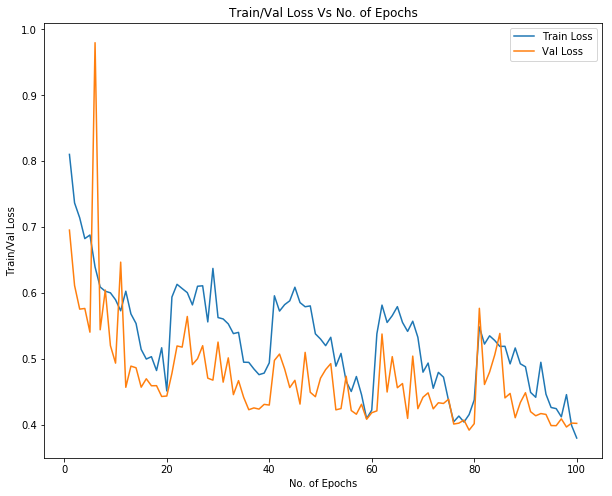

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
f, ax = plt.subplots(figsize=(10, 8))
plt.plot(list(range(1,len(train_loss)+1)),train_loss,label='Train Loss')
plt.plot(list(range(1,len(val_loss)+1)),val_loss,label='Val Loss')
ax.set_title('Train/Val Loss Vs No. of Epochs')
x_axis = plt.xlabel('No. of Epochs')
y_axis = plt.ylabel('Train/Val Loss')
plt.legend()
plt.show() 

In [11]:
correct = 0
total = 0
pred = []
loss = []
with torch.no_grad(): #temporarily set all the requires_grad flag to false.
    for data in validation_loader:
        images, labels = data
        outputs = net(images.cuda())
        _, predicted = torch.max(outputs.data, 1) # value,idx of max value of outputs.data at axis 1
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
        loss.append(criterion(outputs, labels))
        pred.append(predicted.tolist())       

print('Accuracy of the network on the 600 test images: %.2f %%' % (100 * correct / total))
print('Loss of the network on the 600 test images: %.2f' % (np.mean(loss)))

Accuracy of the network on the 600 test images: 85.37 %
Loss of the network on the 600 test images: 0.39


In [12]:
import pickle
net = net.cpu()
pickle.dump(net.state_dict(),open('selfnet_wt2.pkl','wb'))

### Fastai - work directly on raw images

In [1]:
# import numpy as np
# import pickle
# from PIL import Image

# x_apple = pickle.load(open('x_apple2.pickle', 'rb'))
# x_orange = pickle.load(open('x_orange2.pickle', 'rb'))
# x_pear = pickle.load(open('x_pear2.pickle', 'rb'))

# for i in range(600):
#     im1 = Image.fromarray(x_apple[i],'RGB')
#     im1.save('./data/train/apple/'+str(i)+'.png')
    
# for i in range(600):
#     im2 = Image.fromarray(x_orange[i],'RGB')
#     im2.save('./data/train/orange/'+str(i)+'.png')
    
# for i in range(600):
#     im3 = Image.fromarray(x_pear[i],'RGB')
#     im3.save('./data/train/pear/'+str(i)+'.png')

In [1]:
from fastai import *
from fastai.vision import *
import torchvision.models as models

C:\Users\LENOVO\Anaconda3\lib\importlib\_bootstrap.py:205: RuntimeWarning: cymem.cymem.Pool size changed, may indicate binary incompatibility. Expected 48 from C header, got 64 from PyObject
  return f(*args, **kwds)
C:\Users\LENOVO\Anaconda3\lib\importlib\_bootstrap.py:205: RuntimeWarning: cymem.cymem.Address size changed, may indicate binary incompatibility. Expected 24 from C header, got 40 from PyObject
  return f(*args, **kwds)


In [2]:
data = ImageDataBunch.from_folder('./data', valid_pct=0.3, bs=8, size=224)
data.normalize(imagenet_stats) #normalize according to imagnet parameters
data.export() # export.pkl for loading model

In [3]:
learn = create_cnn(data, models.vgg16, metrics=[accuracy])
learn.fit_one_cycle(cyc_len = 10,max_lr = 5e-4,wd = 2e-3)

epoch,train_loss,valid_loss,accuracy
1,1.070872,0.672242,0.740741
2,0.550292,0.325833,0.896296
3,0.442174,0.256584,0.914815
4,0.348859,0.259970,0.911111
5,0.281266,0.274232,0.900000
6,0.291753,0.251297,0.914815
7,0.275030,0.241048,0.922222
8,0.275247,0.252091,0.912963
9,0.210170,0.251556,0.916667
10,0.233165,0.242221,0.920370


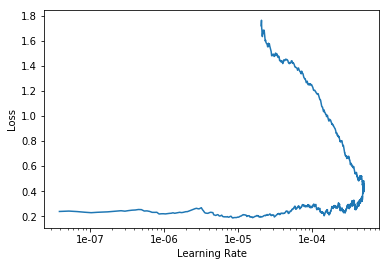

In [4]:
learn.recorder.plot()

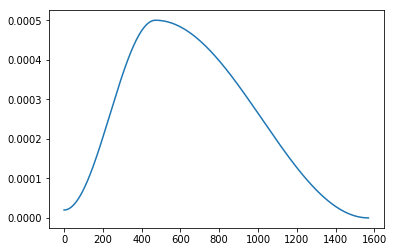

In [5]:
learn.recorder.plot_lr(show_moms=False)

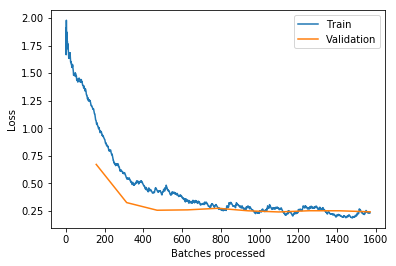

In [6]:
learn.recorder.plot_losses()

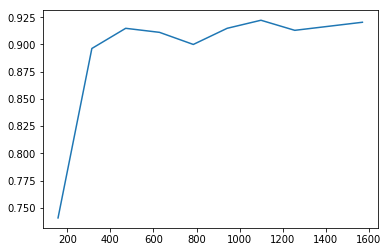

In [7]:
learn.recorder.plot_metrics()

In [54]:
model = learn.model
model = model.eval()
out = model(pil2tensor(Image.open('./data/train/apple/30.png'),'float32').cuda().unsqueeze(0))
prob = F.softmax(out,1)[0].tolist()
prob

[0.9996979236602783, 0.00030212884303182364, 1.268416127686578e-08]

### Summary

In [1]:
import pandas as pd
df = pd.DataFrame([['Keras','Keras','Pytorch','Fastai'],['Resnet50','VGG16','No Transfer Learning','VGG16'],['Step','Step','SGD with Restarts','Cyclical'],[88.5,90.4,85.4,92.0]]).T
df.columns = ['Framework','Model','Learning Rate Decay','Validation Accuracy %']
df

,Framework,Model,Learning Rate Decay,Validation Accuracy %
0,Keras,Resnet50,Step,88.5
1,Keras,VGG16,Step,90.4
2,Pytorch,No Transfer Learning,SGD with Restarts,85.4
3,Fastai,VGG16,Cyclical,92


<span style="color:#003366"><b> The data consist fruit images of apples, oranges and pears scrapped using google-images-download api (max 700+ image for each run regardless of limit set). The scrapped images are filtered for image files that cannot be read by PILLOW and if the dimension of the images != 3 (eg. images with transparency layers). The final data set consist of 1800 images with 1260 train images and 540 images set aside for validation. 

<span style="color:#003366"><b> All models were tuned briefly to ensure minimal overfitting. Transfer learning by VGG16 appeared to be more easily tuned than resent50 and better performance was achieved very quickly. Cyclical learning rate as proposed by Leslie Smith (https://arxiv.org/abs/1506.01186) and used as a default in fastai appears to be useful here. High learning rates facilitates getting out of local optima/saddle points and low learning rates allow faster convergence without oscillations about the optima. In fastai, learning rate was first increased to max_lr and then decreased to a min_lr for 1 cycle. This cycle can be repeated with 'Restarts' as the learning rate increases again. In pytorch, SGD with restarts was coded manually. The model starts with initial lr as max_lr and decreases through cosine annealing to min lr in 1 cycle. The cycle is then repeated many times with the learning rate jumping back to max_lr at the start of each cycle. By training a simple model with just 7 layers from scratch (with the small dataset), an almost comparable accuracy of 85% could be achieved.

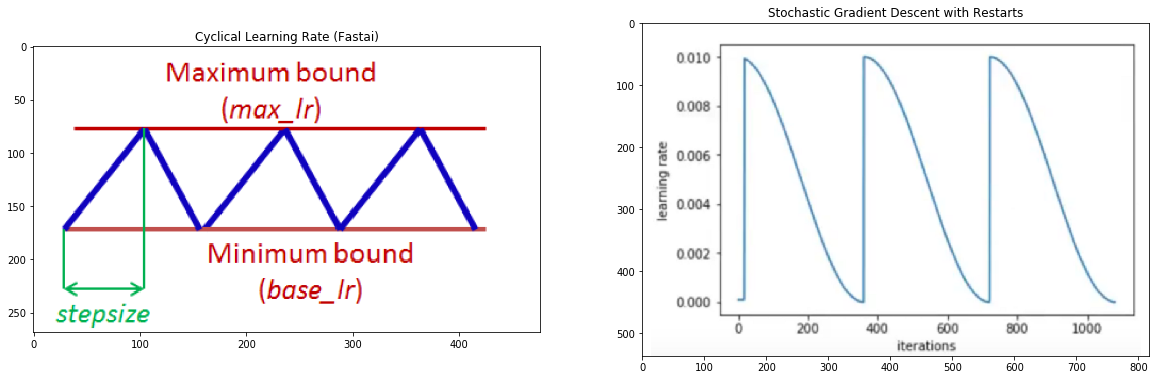

In [3]:
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline
f, ax = plt.subplots(1,2,figsize=(20, 8))
ax[0].imshow(Image.open('./cyclic.png'))
ax[0].set_title('Cyclical Learning Rate (Fastai)')
ax[1].imshow(Image.open('./SGDR.png'))
ax[1].set_title('Stochastic Gradient Descent with Restarts')
plt.show() 

### 2.4 Deploy model

You can start with a simple localhosted [Python Flask](http://flask.pocoo.org) app for the deployment of your model. In this Flask app, provide an HTML endpoint that allows a user to submit a datapoint, and provide a prediction. Ensure that a user is able to make calls to your API by providing an input. A simple way to test this would be through the Postman application.

<font color=darkblue>We will use the PIL package to help process the image given into the appropriate format. Your endpoint should accept a 224x224 image, which PIL can convert into a numpy array to be ingested as a tensor into the model.

Write a `@app.route` to take in a request from a user, and provide a prediction response to the user. For those who are new to applications, take some time to understand how web servers are designed, and specifically, what are routes  in the context of a Flask app.</font>

For people who are more advanced, you could also deploy your model in the following environments:
- **Server**
  - Local
  - Self-hosted (WSGI, Nginx)
  - App Engine
  
- **Docker**
- **Front-end browser-based**
  - tensorflow.js + GitHub Pages
- **Mobile (Android)** <br>
  - Package as an APK for distribution

<span style="color:#003366"><b> A Flask app was built to deploy the fruit classifier. The app allows users to upload images to the server and returns a prediction of whether the image contains apples, oranges or pears with the associated probability. Files uploaed must be images in a format that is readable by PILLOW (eg. png, jpg, bmp). If an unreadable image or an image with dimension !=3 is uploaded, image read error and image dimension error will be shown. The user can upload a new image using the link at the top left corner. Heroku uses the Procfile and Google App Enigne uses app.yaml to define how the uploaded files are deployed. Dependencies are installed using the requirements file.
    
<span style="color:#003366"><b> Issue1:  Fresh default graph required for tensorflow in keras model for each new prediction in Flask app  <br/>
<span style="color:#003366"><b> Issue2: Caching needs to be cleared in the Flask app to avoid same images repeatedly showing up <br/>
<span style="color:#003366"><b> Issue3: Keras h5 model loading is slow (potential timeout issues in heroku), possibly use a smaller model, try pickling (not recommended for normal model loading) or seperate model and weights files <br/>
<span style="color:#003366"><b> Issue4: Google app engine enforce a hard limit of 32MB for single static files although the total storage size for the whole app is 1GB. 32MB could potentially be too small for most model/weights files. For deployment in Google App Engine, Google Cloud Storage could be used to store model/weights files and read from app as bytes objects. This would also faciliate model/weights updating (eg retrained with new images) as the file in Google Cloud Storage can be easily changed. For example, model could be retrained in Google Cloud Platform VM instances and directly uploaded to Google Cloud Storage through a mounted bucket (Google Cloud Storage FUSE). For deployment outside Google cloud platform, take note of credentials authorization<br/>

<span style="color:#003366"><b> Keras model based on transfer learning from VGG16 trained on Imagenet deployed on heroku at https://peaora-app.herokuapp.com/ Source code uploaded to bitbucket and model h5 file hosted on dropox at https://www.dropbox.com/s/xop1xmt8ngwopvh/vgg16.h5

<span style="color:#003366"><b> Pytorch model based on Cyclical learning rate with Restarts and trained from scratch deployed  on Google Flexible App Engine at https://torched-fruit.appspot.com/ [disabled]. Source code uploaded to bitbucket will not run locally due to not having the credentials to access Google Cloud Storage. The codes can be modified to include the pytorch state_dict hosted at https://www.dropbox.com/s/eosp9poooadvsv0/selfnet_wt.pkl 

## 3. A Little Bit More

In this next section, we will look at some other bits of application development that could be useful to know.

### 3.1 Unit Testing, Integration Testing

In the space of software engineering, complex operations happening within apps, in conjunction with multiple engineers working on multiple areas, make application development a hairy and unstable process. To mitigate the risks of bugs appearing in production environments, we write thorough tests that, to the best of our ability, ensure the accuracy and stability of our code. 

We will not go into detail into this section as this lies in the domain of software engineering, but understand that in production environments, testing is key to stability of any app. In addition, we use approaches like test-driven development (TDD), as well as a mix of tests at different levels.

It is interesting to note the inherent probabalistic nature of machine learning models - we are not going to get the right predictions every time. How do we ensure that our tests will ensure the correctness of our code in the probabalistic, flaky environment of machine learning? We don't exactly have a gold standard answer to this question right now.

### 3.2 Documentation (Important - Submission Details)

Documentation is extremely important to ensure that when we pass our code on to another analyst or engineer, they will know how to work with and modify the code for their own use. Especially given that AI Singapore needs highly reusable code and exchange of information between teams, we would like to set high standards for documentation.

For this assignment, we would expect a basic level of documentation written in a `README.md` in your repository. This document should discuss what your app would do, and give basic instructions - lines of bash commands - that can guide a user to run your code base on his computer. The right way to do this is to ask a partner to try running your code from the GitHub repository. If it runs with your instructions, you're good to go.

[Here's a good, simple README.md file.](https://github.com/berlotto/flask-app-template)

__Submission__: to submit, create a NEW REPOSITORY this week inside [this new project folder](https://bitbucket.ai3.aisingapore.org:9443/projects/ABA/) and push your code instead. Be sure to include a README.md as well as a [.gitignore](https://www.gitignore.io/) (as discussed by Deepan a few weeks ago). Please __do not__ upload large datasets or model weights into the repository - we have limited server space!

## 4. Examples

These are some ideas to get you started:


**Image**

  - Classify flowers: https://www.tensorflow.org/hub/tutorials/image_retraining
  - Classify pictures of food for mobile users that helps them to easily attach hashtags for their Instagram post.
  - Create your home security camera that detects faces of your family members using Raspberry Pi and grants access.
  - Classify if a picture is an item that can be recycled or not. 
  - Recognise mathematical equations using Optical Character Recognition.
  - Singlish meme: Automatically caption pictures.
  - Style transfer: Generate an image of a utopia given an input.

**Text**
  - Generate text https://www.tensorflow.org/tutorials/sequences/text_generation
  - Summarise a code in 1 paragraph.
  - Using POS tagging, summarise a research paper in 1 paragraph.
  - Use NLP to generate a Jupyter notebook exercise for AIAP for the next week.
  - Cluster AI Singapore's web pages into meaningful categories.
  - Generate/classify fake news in Singapore.
  - A Singlish aunty-chatbot for buying groceries.

**Audio**
  - Classify sounds https://www.tensorflow.org/tutorials/sequences/audio_recognition
  - Classify between the different Chinese dialects.
  - Speech-to-Text application that identifies the main keywords and googles them.
  - Transpose a music from major to minor scale using recurrent neural networks.

**Video**
  - A better push-up/sit-ups counter (oops).
  - Dance-Dance revolution.
  - Control a character in a game using pose recognition.